In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
import matplotlib.pyplot as plt
df=pd.read_csv('linear_separable.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Extracting values for training set
x1_train = train_df['x1'].values
x2_train = train_df['x2'].values
y_train = train_df['y'].values

# Extracting values for validation set
x1_val = val_df['x1'].values
x2_val = val_df['x2'].values
y_val = val_df['y'].values


In [ ]:
def my_kernel(x1_train, x2_train, type='linear'):
    if type == 'linear':
        return np.dot(x1_train, x2_train)
    pass

In [33]:
K=my_kernel(x1_train,x2_train)
def dual_objective(alpha , K, y_train):
    n=len(y_train)
    term2=0
    for i in range(n):
        for j in range(n):
            term2 += alpha[i]*alpha[j]*y_train[j]*K
    term2=0.5*term2
    term1= np.sum(alpha)
    return term2-term1

In [34]:
C_val=1.0
bound=[(0, C_val) for _  in range(len(y_train))]
cons={'type':'eq','fun':lambda a: np.dot(a,y_train)}

In [35]:
initial_guess=np.zeros(len(y_train))
result =minimize(dual_objective,initial_guess,args=(K,y_train),method='SLSQP',bounds=bound,constraints=cons)

KeyboardInterrupt: 

1. The above code was taking very long computation time so I switched to library driven code as below:

In [ ]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
df=pd.read_csv('linear_separable.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Extracting values for training set
x1_train = train_df['x1'].values
x2_train = train_df['x2'].values
y_train = train_df['y'].values


X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='linear' uses the exact same math you are trying to write
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

print("Coefficients (w):", model.coef_)
print("Intercept (b):", model.intercept_)

Coefficients (w): [[0.24130345 0.23465752]]
Intercept (b): [-0.01042055]


[2.15744752]


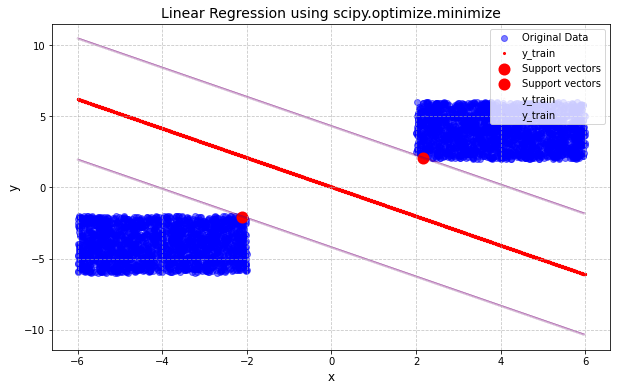

In [71]:
x1=np.linspace(min(x1_train),max(x1_train),4000)
Y=(model.coef_[0][0]*x1+model.intercept_[0])/(-model.coef_[0][1])
Y1=(model.coef_[0][0]*x1_train+model.intercept_[0]+1)/(-model.coef_[0][1])
Y3=(model.coef_[0][0]*x1+model.intercept_[0]+1)/(-model.coef_[0][1])
Y2=(model.coef_[0][0]*x1_train+model.intercept_[0]-1)/(-model.coef_[0][1])
Y4=(model.coef_[0][0]*x1+model.intercept_[0]-1)/(-model.coef_[0][1])
# Use the & operator and wrap conditions in parentheses
mask2 = (x2_train > Y2 - 0.001) & (x2_train < Y2 + 0.001)
mask1 = (x2_train > Y1 - 0.001) & (x2_train < Y1 + 0.001)
x1_SV1 = x1_train[mask2]
x1_SV2=x1_train[mask1]
x2_SV1=x2_train[mask2]
x2_SV2=x2_train[mask1]
print(x1_SV1)
plt.figure(figsize=(10,6))
plt.scatter(x1_train, x2_train ,color="blue",alpha=0.5,label='Original Data')
plt.scatter(x1, Y, color='red', linewidth=2, label="y_train",s=1.2) 
plt.scatter(x1_SV1, x2_SV1, color='red', linewidth=2, label="Support vectors",s=100) 
plt.scatter(x1_SV2, x2_SV2, color='red', linewidth=2, label="Support vectors",s=100) 
plt.scatter(x1, Y3, color='purple', linewidth=2, label="y_train",linestyle='dotted', s=0.01,alpha=0.2) 
plt.scatter(x1, Y4, color='purple', linewidth=2, label="y_train",linestyle=':',s=0.01,alpha=0.2) 
plt.title('Linear Regression using scipy.optimize.minimize', fontsize=14) 
plt.xlabel('x', fontsize=12) 
plt.ylabel('y', fontsize=12) 
plt.legend() 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()